In [9]:
# a) Load the Iris dataset
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
scaler = StandardScaler()
y_encoded = np.zeros((y.size, y.max() + 1))
y_encoded[np.arange(y.size), y] = 1
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (120, 4)
Test set shape: (30, 4)


In [10]:
# b) Initialize network parameters (1 hidden layer)
input_size = X_train.shape[1]
hidden_size = 6
output_size = y_train.shape[1]
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))
print("Initialized weights and biases.")

Initialized weights and biases.


In [11]:
# c) Feedforward, error calculation, and backpropagation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def feedforward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def backpropagation(X, y_true, z1, a1, z2, a2, W2):
    m = y_true.shape[0]
    error_output = a2 - y_true
    dW2 = np.dot(a1.T, error_output * sigmoid_derivative(z2)) / m
    db2 = np.sum(error_output * sigmoid_derivative(z2), axis=0, keepdims=True) / m

    error_hidden = np.dot(error_output * sigmoid_derivative(z2), W2.T)
    dW1 = np.dot(X.T, error_hidden * sigmoid_derivative(z1)) / m
    db1 = np.sum(error_hidden * sigmoid_derivative(z1), axis=0, keepdims=True) / m
    return dW1, db1, dW2, db2

In [12]:
# d) Training loop with multiple iterations
learning_rate = 0.1
epochs = 500
loss_history = []

for i in range(epochs):
    z1, a1, z2, a2 = feedforward(X_train, W1, b1, W2, b2)
    loss = compute_loss(y_train, a2)
    loss_history.append(loss)
    dW1, db1, dW2, db2 = backpropagation(X_train, y_train, z1, a1, z2, a2, W2)
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

print("Training complete.")


Training complete.


In [13]:
# e) Weights are updated in the loop above.
print("Final W1:\n", W1)
print("Final b1:\n", b1)
print("Final W2:\n", W2)
print("Final b2:\n", b2)

Final W1:
 [[ 0.49482845  0.42488928  0.16875815  1.52324036  0.32566348 -0.11932766]
 [ 1.5782564   1.23048574 -0.80553472  0.54230035  0.01035521 -0.42003058]
 [ 0.240398   -1.89117724 -1.84921329 -0.56202693 -1.01047211  0.38836563]
 [-0.90865524 -1.444283    1.44587724 -0.22586823  0.02945425 -1.40659415]]
Final b1:
 [[-3.05364295e-04  1.24596193e-01 -9.73594477e-02  4.09770162e-05
   1.23949274e-01  2.17351352e-02]]
Final W2:
 [[-0.44226894 -0.20766438 -0.43147863]
 [ 1.90877507 -1.12845872 -0.69956219]
 [-0.53804859  1.80966125 -0.02254261]
 [-0.95591269  0.50440645 -0.50128688]
 [ 0.41209152 -1.97047999 -1.4200469 ]
 [ 0.25857151  0.75940916  0.13759523]]
Final b2:
 [[ 0.1013847  -0.31803449  0.719965  ]]


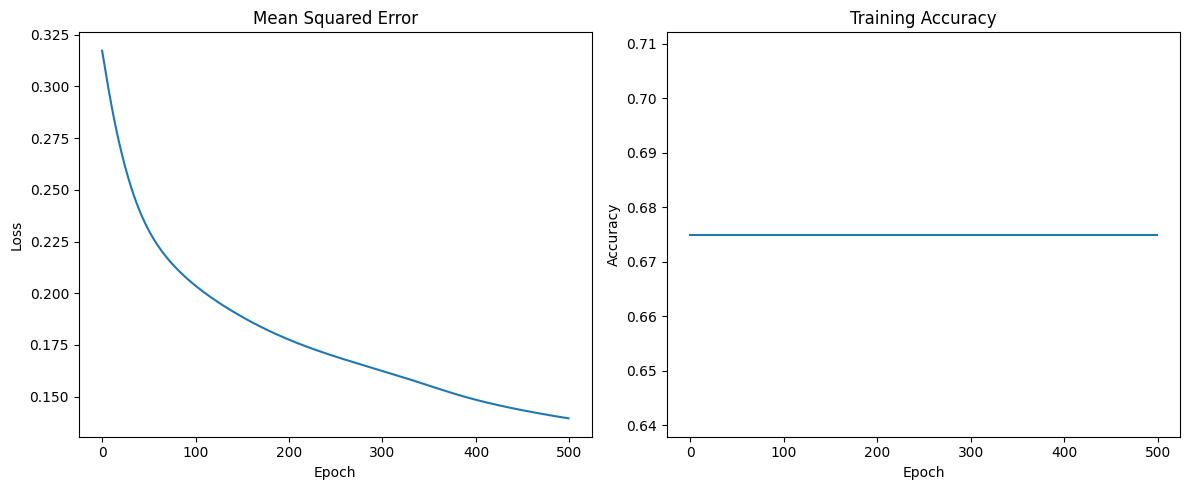

In [14]:
# f) Plot Mean Squared Error and Accuracy
import matplotlib.pyplot as plt

def compute_accuracy(y_true, y_pred):
    correct = np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1)
    return np.mean(correct)

accuracy_history = []

for i in range(epochs):
    _, _, _, a2 = feedforward(X_train, W1, b1, W2, b2)
    acc = compute_accuracy(y_train, a2)
    accuracy_history.append(acc)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(loss_history)
plt.title("Mean Squared Error")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1, 2, 2)
plt.plot(accuracy_history)
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

In [15]:
# g) Accuracy already plotted above
final_accuracy = accuracy_history[-1]
print(f"Final Training Accuracy after {epochs} epochs: {final_accuracy * 100:.2f}%")

Final Training Accuracy after 500 epochs: 67.50%


In [16]:
# h) Evaluate on test data
_, _, _, test_predictions = feedforward(X_test, W1, b1, W2, b2)
test_accuracy = compute_accuracy(y_test, test_predictions)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Test Accuracy: 63.33%
